# Histogram Specification
<p style='direction:rtl; text-align: right'>
در این تمرین برای تبدیل هیستوگرام‌ها، همانطور که در درس داشتیم، ابتدا تابع توزیع تجمعی پیکسل‌ها را برای تصویر اصلی
و تصویر هدف به دست می‌‌آوریم و سپس وارون تابع توزیع تجمعی تصویر هدف را روی تابع توزیع تجمعی تصویر اصلی
اعمال میکنیم تا تبدیل اینتنسیتی تصویر اصلی به تصویر مقصد به دست آید. حال تبدیل به دست آمده را روی تصویر اصلی اعمال میکنیم.
این کار را به ازای هر یک از کانال‌های RGB انجام می‌دهیم.
</p>

<p style='direction:rtl; text-align: right'>
ابتدا ایمپورت‌های لازم را انجام میدهیم.
</p>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

<p style='direction:rtl; text-align: right'>
تصاویر را از فایل میخوانیم.
</p>

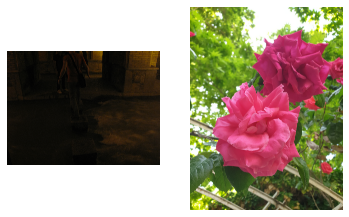

In [2]:
pic_orig = cv.cvtColor(cv.imread('./data/Dark.jpg'), cv.COLOR_BGR2RGB)
pic_tar = cv.cvtColor(cv.imread('./data/Pink.jpg'), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2)
for i,p in enumerate([pic_orig,pic_tar]):
    ax[i].axis('off')
    ax[i].imshow(p)
plt.show()

<p style='direction:rtl; text-align: right'>
در ادامه پیاده سازی تبدیل هیستوگرام را می بینید.
</p>

In [3]:
def specify_histogram(source, target):
    source_vals, source_freq = np.unique(source.ravel(), return_counts=True)
    target_vals, target_freq = np.unique(target.ravel(), return_counts=True)

    source_freq = np.cumsum(source_freq).astype(np.float64)
    source_freq /= source_freq[-1]
    target_freq = np.cumsum(target_freq).astype(np.float64)
    target_freq /= target_freq[-1]

    func = np.zeros(256, np.float64)

    for i, j in zip(source_vals, source_freq):
        func[i] = j

    transform = interp1d(target_freq, target_vals, bounds_error=False, fill_value=(target_vals[0], target_vals[-1]))
    func = transform(func).astype(np.uint8)

    return func[source]


<p style='direction:rtl; text-align: right'>
تبدیل را به ازای هر کانال انجام می‌دهیم و حاصل را ذخیره می‌کنیم.
</p>

channel 1 of 3
channel 2 of 3
channel 3 of 3


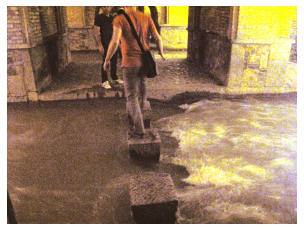

In [4]:
pic_res = pic_orig.copy()
for i in range(3):
    print(f'channel {i + 1} of 3')
    pic_res[:, :, i] = specify_histogram(pic_orig[:, :, i], pic_tar[:, :, i])
plt.imsave('./out/res06.jpg', pic_res)

plt.axis('off')
plt.imshow(pic_res)
plt.show()

<p style='direction:rtl; text-align: right'>
هیستوگرام را به دست می‌‌آوریم و ذخیره میکنیم. از آنجایی که هیستوگرام تصویر حاصل کمی حالت نا پیوسته پیدا میکند،
برای آن ترندلاینی نیز رسم می کنیم تا بهتر دیده شود.
</p>

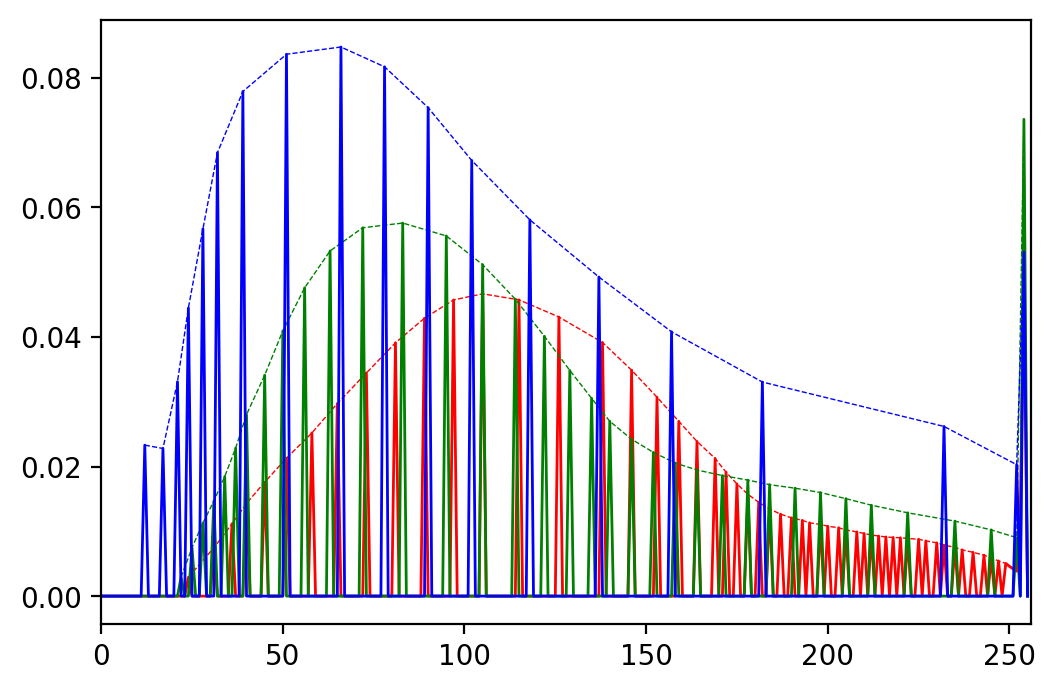

In [5]:
plt.figure(dpi=200)

color = ('r', 'g', 'b')
for j, col in enumerate(color):
    hist = cv.calcHist([pic_res], [j], None, [256], [0, 256]).astype(np.float64).ravel()
    hist /= hist.sum()
    plt.plot(hist, color=col, linewidth=1)
    plt.plot(np.nonzero(hist)[0], hist[np.nonzero(hist)],'--', color=col, linewidth=0.5)
    plt.xlim([0, 256])

plt.savefig('./out/res05.jpg')
plt.show()